# 1.Import Libraries and Dependencies

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Input, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

2025-01-04 11:38:39.668351: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-04 11:38:39.668523: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-04 11:38:39.850675: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# 2. Data Directory Exploration

In [2]:
import os
for dirname in os.listdir('/kaggle/input/covidbact'):
    print(dirname)
    #for filename in filenames:
    #    print(os.path.join(dirname, filename))

#datafolder =
print(os.listdir('/kaggle/input/covidbact'))
#folders = os.listdir(data_folder)

COMIBNED_Only_AP
['COMIBNED_Only_AP']


# 3. Data Loading and Preprocessing

In [3]:
# Path to the data folder containing train and test folders

data_folder ='/kaggle/input/covidbact'
# Load the images and labels into lists
images = []
labels = []
folders = os.listdir(data_folder)
class_names = os.listdir(os.path.join(data_folder,folders[-1]))
#class_names.remove('.DS_Store')

print(class_names)

for folder in folders:
    folder_path = os.path.join(data_folder, folder)
    for class_index, class_name in enumerate(class_names):
        class_folder_path = os.path.join(folder_path, class_name)
        print(class_folder_path)
        if class_folder_path.find(".DS") != -1:
          continue
        for filename in os.listdir(class_folder_path):
            if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
            #if filename.endswith(('.jepg''.jpg','.png')):
                img = load_img(os.path.join(class_folder_path, filename), target_size=(224, 224))
                img_arr = img_to_array(img)
                images.append(img_arr)
                labels.append(class_index)

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=4)

# Scale the pixel values to a range between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

['Bacteria', 'Healthy', 'Covid']
/kaggle/input/covidbact/COMIBNED_Only_AP/Bacteria
/kaggle/input/covidbact/COMIBNED_Only_AP/Healthy
/kaggle/input/covidbact/COMIBNED_Only_AP/Covid


# 4. Data Splitting and Sample Image Visualization

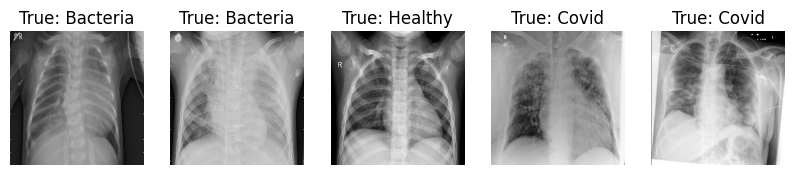

In [4]:
# Display sample images at the beginning
sample_images = X_test[:5]  # Change the number to display more or fewer images
sample_labels = y_test[:5]

plt.figure(figsize=(10, 5))
for i in range(len(sample_images)):
    plt.subplot(1, len(sample_images), i + 1)
    plt.imshow(sample_images[i].reshape(224, 224, 3))
    plt.title(f'True: {class_names[sample_labels[i]]}')
    plt.axis('off')
plt.show()

# 5. Label Encoding

In [5]:
#to encode labels into numerics
def convert(array):
  encoded = []
  for i in array:
    column  =[0] * len(class_names)
    column[i] = 1
    encoded.append(column)
  return np.array(encoded)

y_train = convert(y_train)
y_test = convert(y_test)

In [6]:
X_train.shape, y_train.shape , X_test.shape, y_test.shape

((852, 224, 224, 3), (852, 3), (213, 224, 224, 3), (213, 3))

In [7]:
y_train[1]

array([0, 1, 0])

# 6. CNN Model Architecture

In [8]:
# Build the MLP model
model = Sequential()
inputshape = X_train.shape[1:]
#model.add(Input(shape = X_train.shape[1:],))

model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation=tf.keras.layers.LeakyReLU(alpha=0.01), input_shape=inputshape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='valid', activation=tf.keras.layers.LeakyReLU(alpha=0.01), input_shape=inputshape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Use softmax activation for multi-class classification

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,915,843 (91.23 MB)

 Trainable params: 23,915,843 (91.23 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Model Training

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=16, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 55s 977ms/step - accuracy: 0.6282 - loss: 1.2633 - val_accuracy: 0.8122 - val_loss: 0.4194
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 53s 979ms/step - accuracy: 0.9463 - loss: 0.1668 - val_accuracy: 0.9390 - val_loss: 0.1550
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 81s 969ms/step - accuracy: 0.9791 - loss: 0.0582 - val_accuracy: 0.9249 - val_loss: 0.2357
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 82s 977ms/step - accuracy: 0.9854 - loss: 0.0540 - val_accuracy: 0.9577 - val_loss: 0.1649
Epoch 5/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 53s 975ms/step - accuracy: 0.9906 - loss: 0.0304 - val_accuracy: 0.9531 - val_loss: 0.1857


# 8. Model Evaluation

In [10]:
# Calculating only Test Set Accuracy of the Model
loss, accuracy = model.evaluate(X_test, y_test)

#print(%.3f"Accuracy : {accuracy}")
print('Accuracy : %.3f' % accuracy)

y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred, axis =1)
New_y_test = np.argmax(y_test, axis =1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 413ms/step - accuracy: 0.9702 - loss: 0.1208
Accuracy : 0.953
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 414ms/step


# 9. Performance Metrics and Visualization

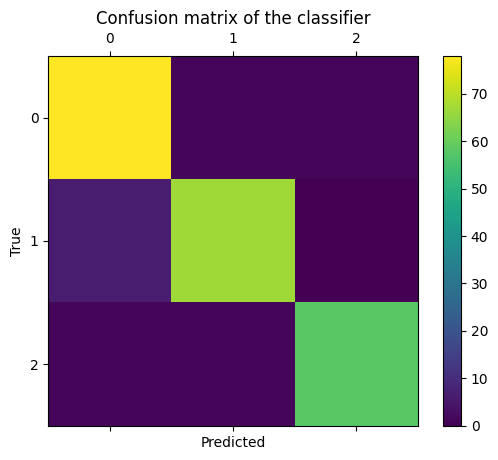

Accuracy :0.9531
0.9572 0.9532 0.9546


In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

cm = confusion_matrix(New_y_test, y_pred)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print("Accuracy :" + str(round(accuracy_score(New_y_test, y_pred),4)))
p, r, f, s = precision_recall_fscore_support(New_y_test, y_pred, average='macro')
print(round(p,4),round(r,4),round(f,4))

# 10. Final Dataset Visualization

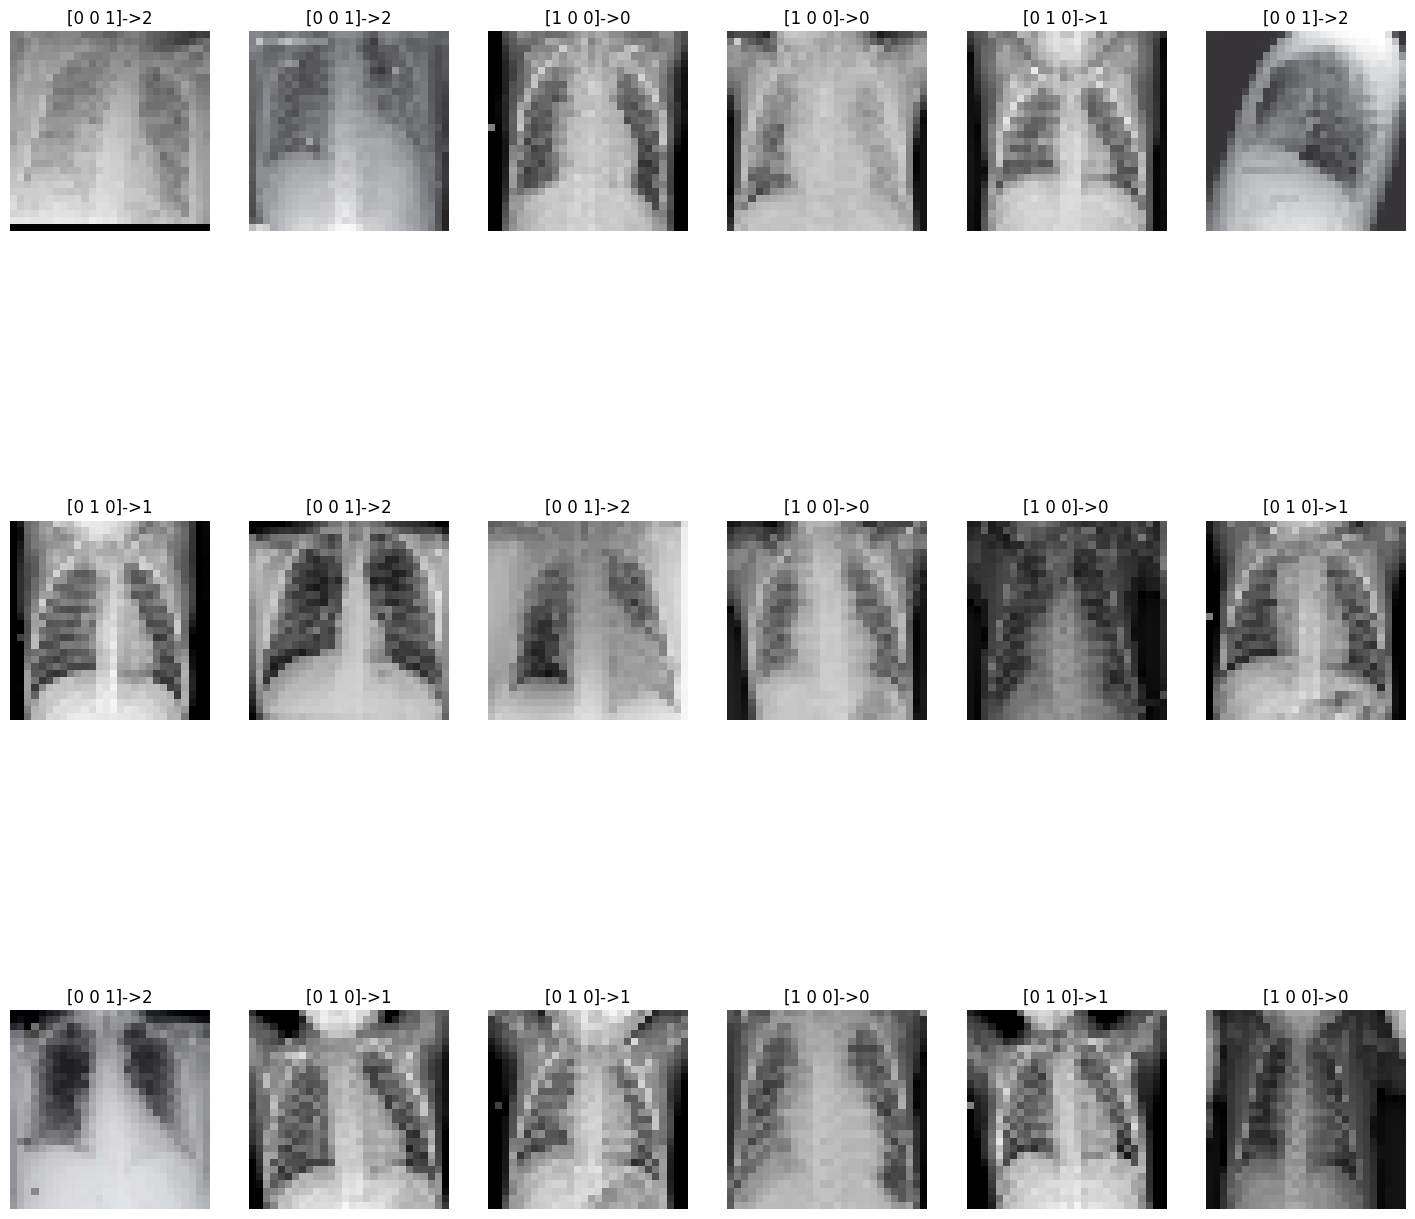

In [12]:
#Visualising the Fire Dataset Samples
import cv2

plt.figure(figsize=(18, 18))
for i in range(18):
  plt.subplot(3, 6, i + 1)
  fignum = np.random.randint(1, high=100)
  plt.imshow(cv2.resize(X_test[fignum], (28, 28)))
  strname = str(y_test[fignum])+"->"+str(y_pred[fignum])
  plt.title(strname)
  plt.axis("off")